---

# Ioannou_Georgios


## Copyright © 2023 by Georgios Ioannou


---

<h1 align="center"> Programmatically Remove Outliers </h1>
<h2 align="left"> Table of Contents </h2>
<ol>
  <li> Using <i style="color:red"> z scores </i> </li>

  <li> Using <i style="color:red"> IsolationForest </i> </li>
</ol>


---

<h2 align="center"> Libraries </h2>


In [1]:
# Import libraries.

import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

---

<h2 align="center"> Main Code </h2>


---

<h3 align="center" style="color:red"> z Scores </h3>


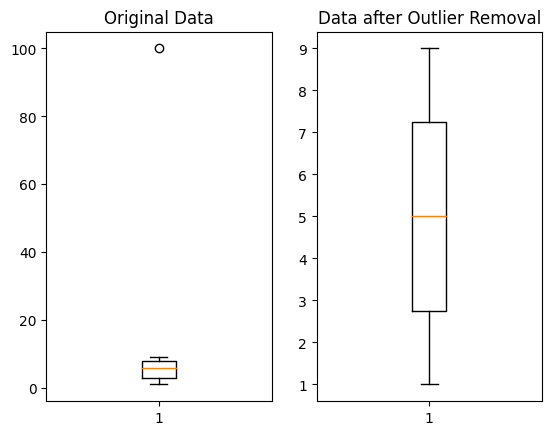

In [2]:
# Example dataset.

data = np.array([1, 2, 3, 4, 100, 6, 7, 8, 9])
z_scores = np.abs(stats.zscore(data))
threshold = (
    2  # Try with different values and see the difference in the diagram on the right.
)
filtered_data = data[z_scores < threshold]

# Plot original data.

plt.subplot(1, 2, 1)
plt.boxplot(data)
plt.title("Original Data")

# Plot data after outlier removal.

plt.subplot(1, 2, 2)
plt.boxplot(filtered_data)
plt.title("Data after Outlier Removal")

plt.show()

---

<h3 align="center" style="color:red"> IsolationForest </h3>


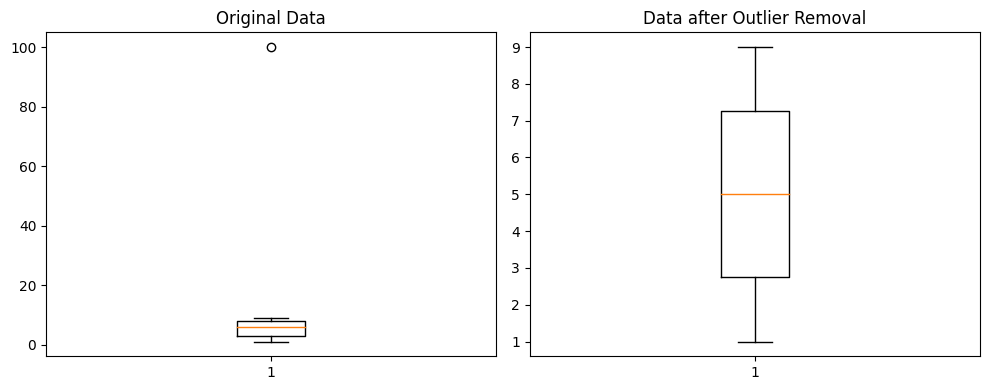

In [3]:
# Example dataset.

data = np.array([1, 2, 3, 4, 100, 6, 7, 8, 9])

# Reshape the data.

data = data.reshape(-1, 1)

# Isolation Forest Algorithm.

clf = IsolationForest(contamination="auto", random_state=42)
clf.fit(data)
is_inlier = clf.predict(data)

# Identify and filter outliers.

filtered_data = data[is_inlier == 1]

# Visualize the results.

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.boxplot(data)
plt.title("Original Data")

plt.subplot(1, 2, 2)
plt.boxplot(filtered_data)
plt.title("Data after Outlier Removal")

plt.tight_layout()
plt.show()

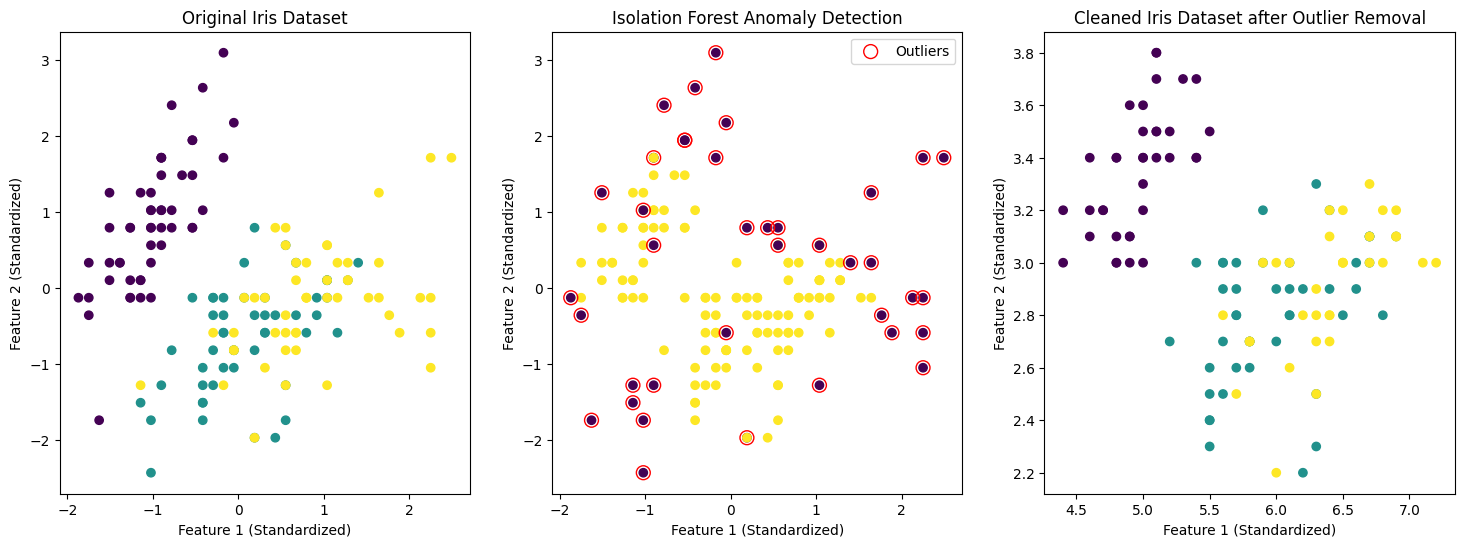

In [4]:
# Load the dataset.

iris = load_iris()

# Features.

X = iris.data

# Target labels.

y = iris.target

# Preprocess the data.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Isolation Forest Algorithm.
#
contamination = "auto"
clf = IsolationForest(contamination=contamination, random_state=42)
y_pred = clf.fit_predict(X_scaled)

# Identify and remove outliers.

outliers_indices = np.where(y_pred == -1)
X_cleaned = np.delete(X, outliers_indices, axis=0)
y_cleaned = np.delete(y, outliers_indices)

# Create subplots for three graphs.

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the original data.

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap="viridis")
axes[0].set_title("Original Iris Dataset")
axes[0].set_xlabel("Feature 1 (Standardized)")
axes[0].set_ylabel("Feature 2 (Standardized)")

# Plot the data with outliers highlighted.

axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap="viridis")
outliers = X_scaled[y_pred == -1]
axes[1].scatter(
    outliers[:, 0],
    outliers[:, 1],
    edgecolors="r",
    facecolors="none",
    s=100,
    label="Outliers",
)
axes[1].set_title("Isolation Forest Anomaly Detection")
axes[1].set_xlabel("Feature 1 (Standardized)")
axes[1].set_ylabel("Feature 2 (Standardized)")
axes[1].legend()

# Plot the cleaned data after outlier removal.

axes[2].scatter(X_cleaned[:, 0], X_cleaned[:, 1], c=y_cleaned, cmap="viridis")
axes[2].set_title("Cleaned Iris Dataset after Outlier Removal")
axes[2].set_xlabel("Feature 1 (Standardized)")
axes[2].set_ylabel("Feature 2 (Standardized)")

plt.show()